In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as sts
%matplotlib inline

## Распределения


### Распределение Бернулли

* Моделирует случайную величину с двумя исходами, один их которых обозначается как успех;
* Характеризуется одним параметром: p — вероятность успеха;
* Другой исход обозначается как неудача, его вероятность равна 1 − p.

Моделируем эксперимент с известной вероятностью успеха, 1 - успех, 0 - неудача:

$
B(X) = 
 \begin{cases}
   q, X=0 \\
   p, X=1
 \end{cases}
$

$p+q=1$

**Характеристики:**

$E(B(X)) = q*0 + p*1 = p$ 

$D[B(X)] = E[B(X^2)] - E[B(X)]^2 = 0^2*q + 1^2*p - p^2 = p - p^2 = p(1 - p) = pq$

**Пример:**

Был ли клик по рекламному баннеру у пользователя? \
Была ли конверсия в покупку на лендинге за один заход? \
Знание клиента о вашем продукте

0.3 0.21


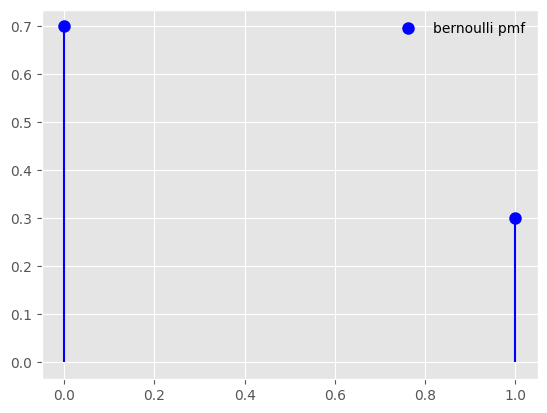

In [3]:
with plt.style.context("ggplot"):
    fig, ax = plt.subplots(1, 1)

    p = 0.3
    mean, var = sts.bernoulli.stats(p)
    print(mean, var)
    dist = sts.bernoulli(p)

    x = np.arange(0, 2)

    ax.plot(x, dist.pmf(x), 'bo', ms=8, label='bernoulli pmf')
    ax.vlines(x, 0, dist.pmf(x), colors='b', linestyles='-')

    ax.legend(loc='best', frameon=False)
    plt.show()

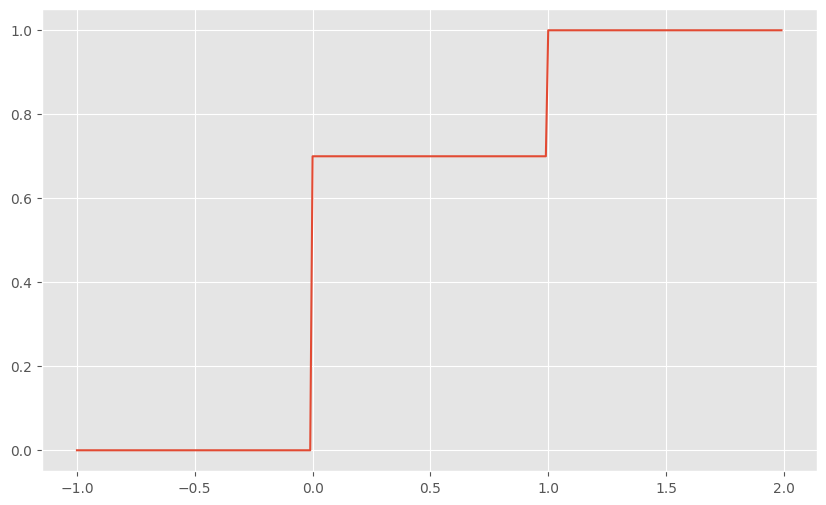

In [4]:
x = np.arange(-1, 2, 0.01)
y = [dist.cdf(i) for i in x]

with plt.style.context("ggplot"):
    plt.figure(figsize=(10, 6))

    plt.plot(x, y)
    
    plt.show()

### Геометрическое распределение

Серия испытаний Бернулли до первого успеха:

![Геометрическое распределение](http://www.mathprofi.ru/t/geometricheskoe_raspredelenie_veroyatnostei_clip_image030.jpg)

$Geom_p(n) = q^{n-1}*p$ 

**Характеристики:**

$E[Geom_p(n)] = \frac{1}{p}$ 

$D[Geom_p(n)] = \frac{q}{p^2}$

**Пример:**

На какой раз при показе пользователь заметит рекламный банер и кликнет на него?

2.5 3.749999999999999


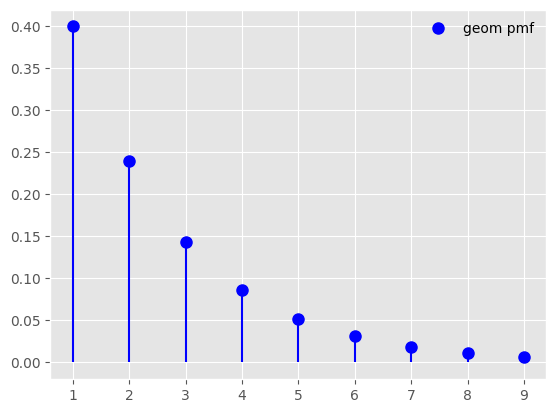

In [5]:
with plt.style.context("ggplot"):
    fig, ax = plt.subplots(1, 1)

    p = 0.4
    dist = sts.geom(p)

    mean, var = dist.stats()
    print(mean, var)

    x = np.arange(dist.ppf(0.01),
                dist.ppf(0.99))

    ax.plot(x, dist.pmf(x), 'bo', ms=8, label='geom pmf')
    ax.vlines(x, 0, dist.pmf(x), colors='b', linestyles='-')

    ax.legend(loc='best', frameon=False)
    plt.show()

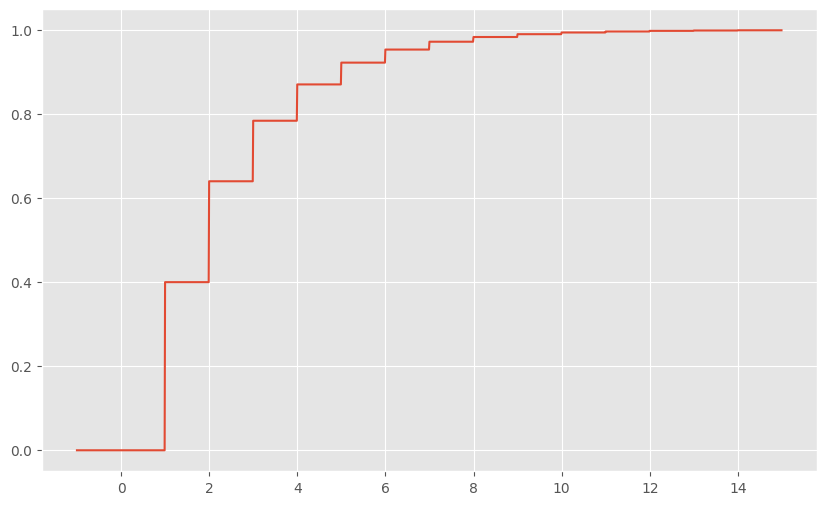

In [6]:
x = np.arange(-1, 15, 0.01)
y = [dist.cdf(i) for i in x]

with plt.style.context("ggplot"):
    plt.figure(figsize=(10, 6))

    plt.plot(x, y)
    
    plt.show()

### Биномиальное распределение

Количество успехов в серии испытания Бернулли:

![Биномиальное распределение](http://www.mathprofi.ru/t/binomialnoe_raspredelenie_veroyatnostei_clip_image031.jpg)

$Bin_{p, n}(k) = C_k^n*p^k*q^{n-k}$

**Характеристики:**

$E[Bin_{p, n}(k)] = np$

$D[Bin_{p, n}(k)] = npq$

**Пример:**

Сколько людей кликнуло на баннер, если его видели n человек?


4.0 2.4


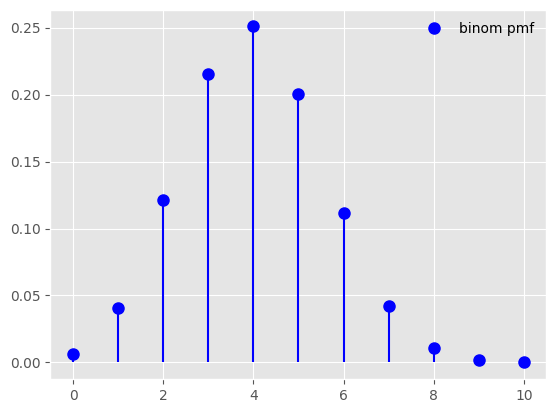

In [7]:
with plt.style.context("ggplot"):
    fig, ax = plt.subplots(1, 1)

    n, p = 10, 0.4
    dist = sts.binom(n, p)

    mean, var = dist.stats()
    print(mean, var)

    x = np.arange(0,
                11)

    ax.plot(x, dist.pmf(x), 'bo', ms=8, label='binom pmf')
    ax.vlines(x, 0, dist.pmf(x), colors='b', linestyles='-')

    ax.legend(loc='best', frameon=False)
    plt.show()

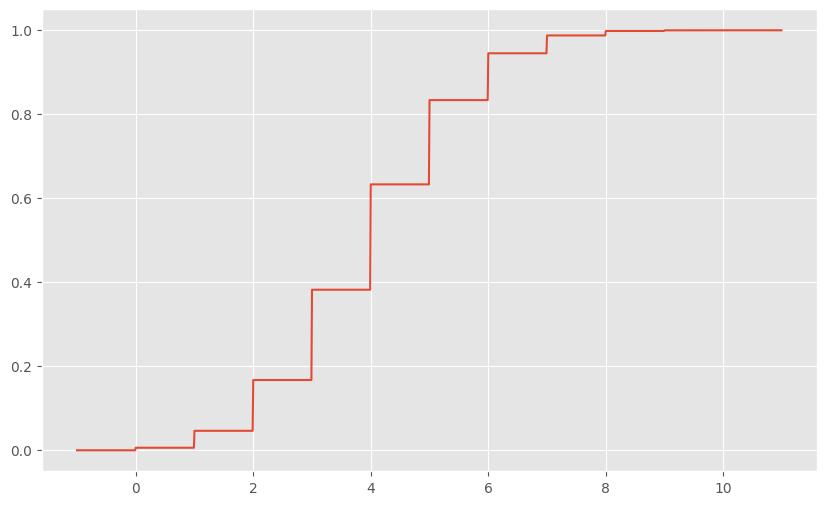

In [8]:
x = np.arange(-1, 11, 0.01)
y = [dist.cdf(i) for i in x]

with plt.style.context("ggplot"):
    plt.figure(figsize=(10, 6))

    plt.plot(x, y)
    
    plt.show()

### Нормальное распределение

$N_{\mu, \sigma}(x) = \frac{1}{\sigma*\sqrt{2\pi}}^{\frac{(x-\mu)^2}{2\sigma^2}}$

**Характеристики:**

$E[N_{\mu, \sigma}(x)] = \mu$

$D[N_{\mu, \sigma}(x)] = \sigma^2$

**Пример:**

Описывает объекты реального мира

0.0 1.0


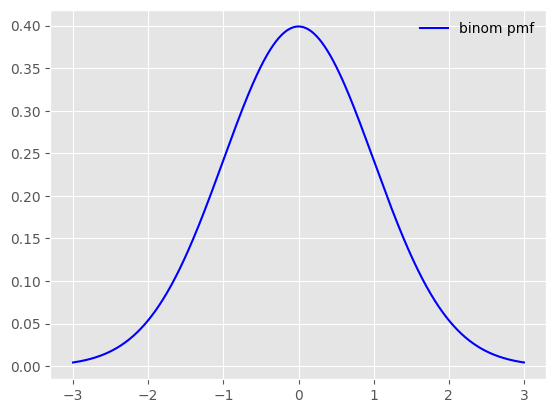

In [9]:
with plt.style.context("ggplot"):
    fig, ax = plt.subplots(1, 1)

    mean, std = 0, 1
    dist = sts.norm(mean, std)

    mean, var = dist.stats()
    print(mean, var)

    x = np.arange(-3,
                3, 0.001)

    ax.plot(x, dist.pdf(x), 'b', ms=8, label='binom pmf')
    # ax.vlines(x, 0, dist.pdf(x), colors='b', linestyles='-')

    ax.legend(loc='best', frameon=False)
    plt.show()

Для нормального распределения полезно использовать правило "трех сигм"

![правило 3-х сигм](https://wiki.loginom.ru/images/3-sigma.svg)

## Центральная предельная теорема и доверительные интервалы

## Условная вероятность

Вероятность события $A$ при условии, что произошло событие $B$

$P(A|B) = \frac{P(A\cap B)}{P(B)}$

![Пересечение](https://upload.wikimedia.org/wikipedia/commons/thumb/9/99/Venn0001.svg/300px-Venn0001.svg.png)

#### Картинка пиццы для визуализации

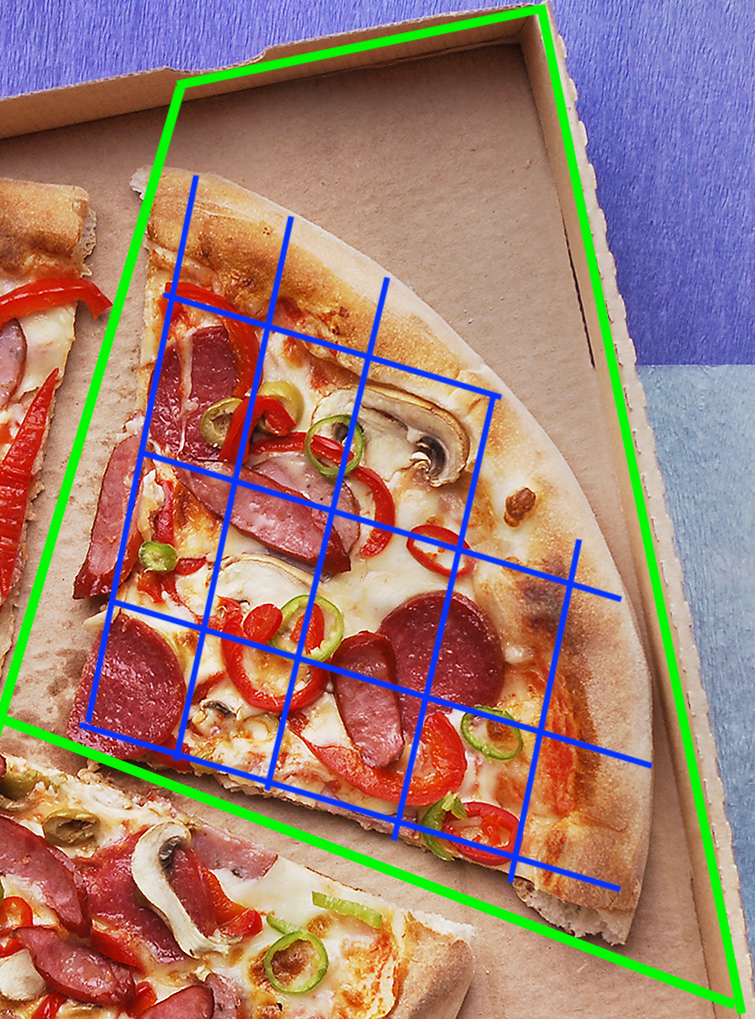

#### Задачи



В урне 11 красных, 10 синих и 9 зеленых шаров. Из нее последовательно вынимают три шара. Найдите вероятность того, что первый шар окажется красным, второй — синим, а третий — зеленым. В ответе приведите обыкновенную дробь.

Найти вероятность того, что оба ребенка в семье - девочки, если: \
а) Старший ребенок девочка \
б) Хотя бы один ребенок - девочка

[ДД, ДМ, МД, ММ]

P(A|B) - оба девочки 

B1 - старший девочка

B2 - хотя бы одна 

$P(A|B_1) = \frac{P(A \cap B_1)}{P(B_1)} = \frac{1/4}{1/2} = 1/2$ \
$P(A|B_2) = \frac{P(A \cap B_2)}{P(B_2)} = \frac{1/4}{3/4} = 1/3$

## Формула полной вероятности

Условие: 

$\Omega = A_1 \cup A_2 \cup ... \cup A_n;$ \
$ A_i \cap A_j = \emptyset$ при $i \ne j;$ \
$ P(A_i) > 0;$

Тогда: 

$B = B \cap \bigcup_{i=1}^n A_i = \bigcup_{i=1}^n B \cap A_i$ \

Посчитаем вероятности: 

$P(B) = \sum_{i=0}^nP(B\cap A_i) =  \sum_{i=0}^nP(B|A_i)P(A_i)$ \
$P(B) = \sum_{i=0}^nP(B|A_i)P(A_i)$

В частности:

$P(B) = P(B|A)P(A) + P(B|\overline{A})P(\overline{A})$

B - возмем зонт 

A - идет дождь

#### Еще одна картинка пиццы

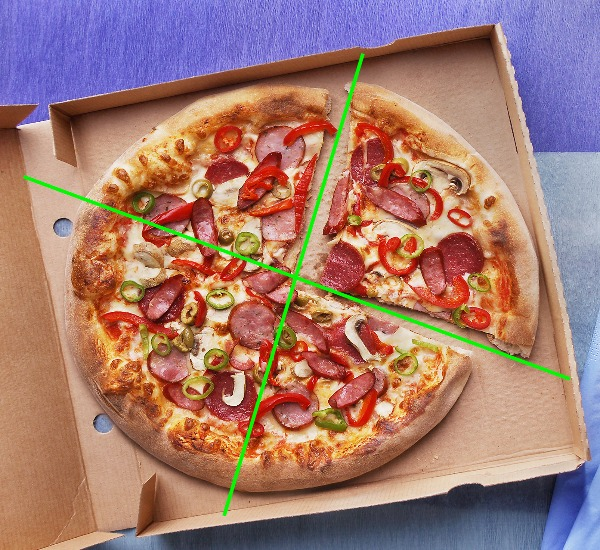

#### Задача:

В эксперименте используются карточки белого и зеленого цветов, на
которых изображены геометрические фигуры: квадрат или треугольник. Вероятность
того, что на зеленой карточке изображен треугольник, равна 0,85. Для белой карточки эта вероятность равна 0,9. Найти вероятность того, что наудачу взятая карточка будет содержать треугольник, если в эксперименте используется одинаковое количество карточек зеленого и белого цветов.

## Формула Байеса

Из формулы условной вероятности легко вывести формулу Байеса:

$P(A\cap B) = P(A|B) * P(B) = P(B|A) * P(A)$

$P(A|B) = \frac{P(B|A)P(A)}{P(B)}$


## Теорема Байеса

$P(A_k|B) = \frac{P(B|A_k)P(A_k)}{\sum_{i=0}^nP(B|A_i)P(A_i)}$

Задача:

В шляпе лежит 3 карточки: одна черная с двух сторон, вторая белая с 2-х сторон, третья - с одной стороны белая, с другой - черная. Мы достаем случайную карточку и видим, что ее лицевая сторона - белая. Какова вероятность, что обратная сторона тоже белая?

$A_1=ББ$ \
$A_2=БЧ$ \
$A_3=ЧЧ$

$B - лицевая\ сторона\ белая$

$P(A_1|B) = \frac{P(B|A_1)P(A_1)}{\sum_{i=0}^3P(B|A_i)P(A_i)} = \frac{1 * 1/3}{P(B|A_1)P(A_1) + P(B|A_2)P(A_2) + P(B|A_3)P(A_3)} = \frac{1/3}{1/3 + 1/2*1/3 + 0} = \frac{1/3}{1/2} = 2/3$ 

# Распределения

### Распределение Бернулли

* Моделирует случайную величину с двумя исходами, один их которых обозначается как успех.

* Характеризуется одним параметром: $p$ — вероятность успеха.

* Другой исход обозначается как неудача, его вероятность равна $1−p$


### Биномиальное распределение

* Моделирует количество успехов в серии независимых экспериментов по схеме Бернулли, — эти эксперименты часто называют испытаниями.

* Характеризуется двумя параметрами: $n$ — количество испытаний и $p$ — вероятность успеха в каждом из них.

* Значения случайной величины — количество успехов: целые числа от $0$ до $n$.

* Формула вероятности $k$ успехов: $P(X=k)=C_n^k⋅p^k⋅(1−p)^{n-k}$, где $C_n^k$​ — число сочетаний, $k$ — количество успехов.

* Математическое ожидание: $E(X)=n⋅p$.

* Дисперсия: $Var(X)=n⋅p⋅(1−p)$.

### Равномерное непрерывное распределение

* Моделирует непрерывную случайную величину, которая равновероятно принимает любое значение в промежутке $[a,b]$, $b>a$.

* Характеризуется двумя параметрами: границами промежутка $a$ и $b$.

* Плотность вероятности равна $1/(b−a)$ на промежутке $[a,b]$ и нулю для любых других значений.

* Математическое ожидание — середина промежутка: $E(X)=(a+b)/2$.

### Нормальное распределение

* Моделирует непрерывную случайную величину, которая подчиняется нормальному закону распределения: значения ближе к центру более вероятны, чем те, что далеко от него.

* Характеризуется двумя параметрами: $μ$ — математическим ожиданием и $σ$ — стандартным отклонением.

### Распределение Пуассона

* Моделирует количество редких событий, которые происходят независимо друг от друга в течение заданного промежутка времени с постоянной средней интенсивностью.

* Характеризуется одним параметром $λ$ — средним количеством событий за интервал.

* Формула вероятности: $P(X=k) = (λ^k⋅e^{-λ})/k!$, где $k$ — число событий.

* Математическое ожидание и дисперсия: $E(X)=Var(X)=λ$.

### Сравнение распределений

Мы собрали сходства и различия распределений в таблицу:

![Таблица распределений.png](https://github.com/Verbasik/Lectures_on_the_theory_of_probability/blob/main/%D0%A2%D0%B0%D0%B1%D0%BB%D0%B8%D1%86%D0%B0%20%D1%80%D0%B0%D1%81%D0%BF%D1%80%D0%B5%D0%B4%D0%B5%D0%BB%D0%B5%D0%BD%D0%B8%D0%B8%CC%86.png?raw=true)

# Аппроксимации

* Биномиальное распределение можно аппроксимировать нормальным, если промежуток от математического ожидания биномиального распределения плюс-минус три его стандартных отклонения лежит в пределах $[0,n]$ — то есть там, где биномиальное распределение определено. 

    Часто встречается условие «достаточно большое $n$ и $p$, не слишком близкое к $0$ или $1$», но оно менее удачно. Для любого $p$, близкого к нулю или единице, но не равного им, можно подобрать достаточно большое $n$, чтобы аппроксимация была хорошей. 

    Считают, что параметры нормального распределения равны мат.ожиданию и дисперсии биномиального распределения: $μ=n⋅p,σ^2=n⋅p⋅(1−p)$.

* Биномиальное распределение можно аппроксимировать распределением Пуассона, если число испытаний $n$ достаточно велико, а вероятность успеха $p$ достаточно мала. При этом считают, что их произведение $n⋅p$ равно параметру распределения Пуассона $λ$ (среднему числу событий в некоторый промежуток времени).

